# Group J

### Group Assignment

### Pushkar Waghchoure 

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys

#### Creating dictionary for our relationship key(int) to string of the variables.
#### Used to convert Numeric User Input to Respective String Values.

In [2]:
keys = {1 : 'Age', 2: 'LoS', 3: 'noofinvestigation', 4: 'nooftreatment',5: 'noofpatients', 6: 'HRG', 7 : 'DayofWeek'}
hrg_keys = {1:'VB02Z', 2: 'VB03Z', 3: 'VB04Z', 4: 'VB05Z', 5: 'VB06Z', 6: 'VB07Z', 7: 'VB08Z', 8: 'VB09Z', 9: 'VB11Z'}
dow_keys = {1: 'Friday', 2: 'Monday', 3: 'Saturday', 4: 'Sunday', 5: 'Thursday', 6: 'Tuesday', 7:'Wednesday' }

#### Function to convert numeric user Input to respective string values (one input)

In [3]:
def int_to_str(x):
   # z = 0
    for i in range(1,len(keys)+1):
        if(x == i):
            z = keys[i]   
    return z

#### Function to convert numeric user Input to respective string values (two inputs)

In [4]:
def int_to_str2(x,y):
    z = 0
    p = 0
    for i in range(1,len(keys)+1):
        if(x == i):
            z = keys[i]
            for j in range(1,len(keys)+1):
                if( y == j):
                    p = keys[j]
    return z,p

#### Function to link numeric user input to respective string values (HRG)

In [5]:
def hrg_values(v):
    for i in range(1,len(hrg_keys)+1):
        if(v == i):
            z = hrg_keys[i]

    return z

#### Function to link numeric user input to respective string values (HRG) 

In [6]:
def dow_values(x):
    for i in range(1,len(dow_keys)+1):
        if(x == i):
            z = dow_keys[i]
    return z  

#### Reading CSV data file, saved as callable dataframe

In [7]:
dfsample = pd.read_csv("AEDsample.csv")
dfsample # also print type of data

,ID,Age,Day,DayofWeek,Period,LoS,Breachornot,HRG,noofinvestigation,nooftreatment,noofpatients
0,P16212,43,20,Saturday,18,203,non-breach,VB08Z,3,1,39
1,P15108,43,17,Wednesday,10,37,non-breach,VB09Z,1,1,40
2,P16075,41,20,Saturday,11,34,non-breach,VB09Z,0,3,30
3,P11421,14,5,Friday,18,102,non-breach,VB11Z,0,1,52
4,P17529,47,24,Wednesday,23,97,non-breach,VB11Z,0,1,28
...,...,...,...,...,...,...,...,...,...,...,...
395,P15743,59,19,Friday,10,43,non-breach,VB11Z,0,1,26
396,P15994,71,20,Saturday,2,219,non-breach,VB08Z,3,1,23
397,P14974,37,16,Tuesday,19,168,non-breach,VB11Z,0,1,65
398,P14074,1,14,Sunday,10,230,non-breach,VB08Z,4,1,31


In [8]:
#Random but Unique sample (seed = 530) 
sample = dfsample.sample(n = 400, random_state = 530)  # n = sample size , random_state sets the seed

In [9]:
# columns within the sample dataframe
sample.columns 

Index(['ID', 'Age', 'Day', 'DayofWeek', 'Period', 'LoS', 'Breachornot', 'HRG',
       'noofinvestigation', 'nooftreatment', 'noofpatients'],
      dtype='object')

#### Generate descriptive statistics that summarise the central tendency, dispersion and shape of a dataset's distribution

In [10]:
sample.describe()

,Age,Day,Period,LoS,noofinvestigation,nooftreatment,noofpatients
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,37.377500,14.375000,12.980000,132.712500,1.420000,1.350000,36.102500
std,25.247844,7.727137,5.418764,75.136333,1.643274,0.699086,13.833126
min,1.000000,1.000000,0.000000,6.000000,0.000000,1.000000,2.000000
25%,16.000000,8.000000,10.000000,68.000000,0.000000,1.000000,26.000000
50%,34.500000,14.000000,13.000000,126.000000,1.000000,1.000000,38.000000
75%,56.000000,21.000000,17.000000,196.250000,3.000000,1.000000,46.000000
max,102.000000,28.000000,23.000000,500.000000,6.000000,4.000000,69.000000


#### Dropping/Removing certain rows from the table generated using the describe() function


In [11]:
A = pd.DataFrame(sample.describe().drop(['count','25%','50%','75%']))
A

,Age,Day,Period,LoS,noofinvestigation,nooftreatment,noofpatients
mean,37.377500,14.375000,12.980000,132.712500,1.420000,1.350000,36.102500
std,25.247844,7.727137,5.418764,75.136333,1.643274,0.699086,13.833126
min,1.000000,1.000000,0.000000,6.000000,0.000000,1.000000,2.000000
max,102.000000,28.000000,23.000000,500.000000,6.000000,4.000000,69.000000


### Function to  allow the user to input the patient ID, and return information about this patient from the sample.

In [12]:
def patient_info():
    
    Patient_Id = input(" Please provide the id of patient ? ")
    Patient_info = sample.loc[sample['ID'] == Patient_Id]
    if Patient_info.empty == True:
        print("Oops! That was no valid number. Try again...")
    else:
        print(Patient_info)

### Correlation function for two submitted variables

In [13]:
def correlation(a,b,data = sample):
    corr =  round(data[a].corr(data[b]) , 3)
    return corr

#### Function to return a correlation heatmap between all variables 

In [14]:
def full_correlation(data = sample):
    corr = data.corr()
    ax = sns.heatmap(corr,  vmin=-1 , vmax=1, center=0, cmap="afmhot_r", square=False)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

### Function - offers a variable range (Min, Max) for the previously selected variable. Continuous variables only

In [15]:
def variable_range(c):

    if(c == "Age"):
         inp4, inp5 = input("Choose 2 numbers between "+A.iloc[2,0].astype(str)+" and "+A.iloc[3,0].astype(str)+", eg. lower bound SPACE upper bound\n").split()
    elif(c == "LoS"):
         inp4, inp5 = input("Choose 2 numbers between "+A.iloc[2,3].astype(str)+" and "+A.iloc[3,3].astype(str)+", eg. lower bound SPACE upper bound\n").split()
    elif(c == "noofinvestigation"):
         inp4, inp5 = input("Choose 2 numbers between "+A.iloc[2,4].astype(str)+" and "+A.iloc[3,4].astype(str)+", eg. lower bound SPACE upper bound\n").split()
    elif(c == "nooftreatment"):
         inp4, inp5 = input("Choose 2 numbers between "+A.iloc[2,5].astype(str)+" and "+A.iloc[3,5].astype(str)+", eg. lower bound SPACE upper bound\n").split()       
    elif(c == "noofpatients"):
         inp4, inp5 = input("Choose 2 numbers between "+A.iloc[2,6].astype(str)+" and "+A.iloc[3,6].astype(str)+", eg. lower bound SPACE upper bound\n").split()

    range_data = sample[(sample[c] >= int(inp4) ) & (sample[c] <= int(inp5))]
    return range_data

### Function - offers a variable range (Min, Max) for the previously selected variable for continuous variables
#### In addition, returning a list of the options for the categorical variables

In [16]:
def categorical(c,data = sample):
    if(c == "Age"):
        inp1 = int(input("Choose one between "+A.iloc[2,0].astype(str)+" and "+A.iloc[3,0].astype(str)+"\n"))
    
    elif(c == "LoS"):
        inp1 = int(input("Choose one between "+A.iloc[2,3].astype(str)+" and "+A.iloc[3,3].astype(str)+"\n"))
    
    elif(c == "noofinvestigation"):
        inp1 = int(input("Choose one between "+A.iloc[2,4].astype(str)+" and "+A.iloc[3,4].astype(str)+"\n"))
    
    elif(c == "nooftreatment"):
        inp1 = int(input("Choose one between "+A.iloc[2,5].astype(str)+" and "+A.iloc[3,5].astype(str)+"\n"))
    
    elif(c == "noofpatients"):
        inp1 = int(input("Choose one between "+A.iloc[2,6].astype(str)+" and "+A.iloc[3,6].astype(str)+"\n"))
    
    elif(c == "HRG"):
        column_values = data[["HRG"]].values
        unique_values = np.unique(column_values)
        print("Choose one from: ")
        for i in range(len(unique_values)):
            print(str(i+1)+" : "+ unique_values[i])
        inp = int(input())
        inp1 = hrg_values(inp)
   
    elif(c == "DayofWeek"):
        column_values = data[["DayofWeek"]].values
        unique_values = np.unique(column_values)
        for i in range(len(unique_values)):
            print(str(i+1)+" : "+ unique_values[i])
        inp = int(input())
        inp1 = dow_values(inp) 
        
    unique_data = data.loc[data[c] == inp1]  #Retriveing Data according to the instructions.
    return unique_data 

#### Function to return Histogram, Box, Pie or Dist plots for the chosen variable. 

In [17]:
def plots(f,j,data = sample):

    if(j==1):  #HISTOGRAM
        if(f=='Age'):
                q = int(input("Please input size of Age ranges \n {eg. 10 = 10 Years}:"))
                bins_list = np.arange(0, 102, q).tolist()

                n, bins, patches = plt.hist(x=data["Age"], bins= bins_list, color='OliveDrab',
                            alpha=0.65, rwidth=0.85)

                plt.grid(axis='y', alpha=0.75)
                plt.xlabel('Age')
                plt.ylabel('Frequency')
                plt.title('Histogram - Age')
                maxfreq = n.max()
            # Set a clean upper y-axis limit.
                plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
            
        elif(f == 'LoS'):
            q = int(input("Please input size of Length of Stay ranges \n {eg . 10 = 10 minutes}:"))

            bins_list = np.arange(0, 500+q+1, q).tolist()

            n, bins, patches = plt.hist(x=data["LoS"], bins= bins_list, color='OliveDrab',
                            alpha=0.65, rwidth=0.85)

            plt.grid(axis='y', alpha=0.75)
            plt.xlabel('LoS')
            plt.ylabel('Frequency')
            plt.title('Histogram - LoS Minutes')
            maxfreq = n.max()
            # Set a clean upper y-axis limit.
            plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
            
        elif(f == 'noofpatients'):
            
            q = int(input("No. of patients in AED: range of interest \n E.g. 10 40 = between 10 and 40 people:"))
            bins_list = np.arange(0, 69, q).tolist()

            n, bins, patches = plt.hist(x=data["noofpatients"], bins= bins_list, color='Orange',
                            alpha=0.65, rwidth=0.85)

            plt.grid(axis='y', alpha=0.75)
            plt.xlabel('noofpatients')
            plt.ylabel('Frequency')
            plt.title('Histogram - noofpatients')
            maxfreq = n.max()
            # Set a clean upper y-axis limit.
            plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
            
        elif(f == 'nooftreatment'):
            data['nooftreatment'].hist()
            print("Insufficent Data to produce useful plot")
            
        elif(f == 'noofinvestigation'):
            data["noofinvestigation"].plot.hist(bins = 20, figsize=(7,4), color="#FF51FF", rwidth=0.9, title="Number of Investigations")
            plt.grid(axis='y', alpha=0.75)
            plt.xlabel('No. of Investigations')
            plt.ylabel('Frequency')
            plt.title('Histogram - No. of Investigations')
            
        elif(f == 'HRG'):
            plt.hist(data["HRG"], bins = 9, color="#FFEFDB", edgecolor='#DEB887') 
            plt.grid(axis='y', alpha=0.75)
            plt.xlabel('HRG')
            plt.ylabel('Frequency')
            plt.title('Histogram - HRG')
            
        elif(f == 'DayofWeek'):
            plt.hist(data["DayofWeek"], bins = 7, color="#FFEFDB", edgecolor='#DEB887') 
            plt.grid(axis='y', alpha=0.75)
            plt.xlabel('DayofWeek')
            plt.ylabel('Frequency')
            plt.title('Histogram - DayofWeek')
            
            
            
    elif(j==2): # Box Plot
        
        if(f=='Age'):
            data["Age"].plot.box() 
        
        elif(f == 'LoS'):
            data["LoS"].plot.box()
        
        elif(f == 'noofinvestigation'):
            data["noofinvestigation"].plot.box()
        
        elif(f == 'nooftreatment'):
            print("Error: Data Available produces unsuitable plot.")
        
        elif(f == 'noofpatients'):
            data["noofpatients"].plot.box()
        
        elif(f == 'HRG'):
            print("Error: Data Available produces unsuitable plot.")
            
        elif(f == 'DayofWeek'):
            data["DayofWeek"].plot.box()
        
    elif(j==3): # PIE CHART
        if(f=='Age'):
            print("Error: Unable to produce pie chart for continuous data")
        elif(f == 'LoS'):
            print("Error: Unable to produce pie chart for continuous data")
        elif(f == 'noofinvestigation'):
            data["noofinvestigation"].value_counts().plot.pie()
        elif(f == 'nooftreatment'):
            data["nooftreatment"].value_counts().plot.pie()
        elif(f == 'noofpatients'):
            print("Error: Unable to produce pie chart for continuous data")
        elif(f == 'HRG'):
            data["HRG"].value_counts().plot.pie()
        elif(f == 'DayofWeek'):
            data["DayofWeek"].value_counts().plot.pie()
               
        
    elif(j==4): # Dist Plot - A Distplot or distribution plot, depicts the variation in the data distribution
        if(f=='Age'):
            sns.displot(data["Age"], color="#7FFF00", bins=100)
        elif(f == 'LoS'):
            sns.displot(data["LoS"], color="#FFEFDB", bins=100)
            print("Error: Plot produced gives minimal Information") 
        elif(f == 'noofinvestigation'):
            sns.displot(data["noofinvestigation"], color="g", bins=20)
        elif(f == 'nooftreatment'):
            sns.displot(data["nooftreatment"], color="#8A2BE2", bins=20)
        elif(f == 'noofpatients'):
            sns.displot(data["noofpatients"], color="#00FFFF", bins=90)
        elif(f == 'HRG'):
            sns.displot(data["HRG"], color="#FF7F50", bins=100)
        elif(f == 'DayofWeek'):
            sns.displot(data["DayofWeek"], color="#1E90FF", bins=100)

### Function - returns Scatter or Box plots for the two chosen variables. 

In [18]:


def plots_two(f,g,h,data= sample):
    if(h==1): # SCATTER PLOTS
        
        if(f == 'Age' or g =='Age'):
            if(f == 'LoS' or g == 'LoS'):
                plt.scatter(data['LoS'],data['Age'],color = "#FF51FF")
                plt.title("Scatter plot of Age VS Length of Stay")
                plt.ylabel("Age")
                plt.xlabel("Length of Stay")
            
            elif(f == 'noofinvestigation' or g == 'noofinvestigation'):
                plt.scatter(data["noofinvestigation"], data["Age"], color = "#FF51FF")
                plt.title("Scatter plot of Age VS No of Investigation")
                plt.ylabel("Age")
                plt.xlabel("No of Investigations")
                
            elif(f == 'nooftreatment' or g == 'nooftreatment'):
                plt.scatter(data['nooftreatment'],data['Age'],color = "#FF51FF")
                plt.title("Scatter plot of Age VS No of Treatment")
                plt.ylabel("Age")
                plt.xlabel("No of Treatment")
            
            elif(f == 'noofpatients' or g == 'noofpatients'):
                plt.scatter(data['noofpatients'],data['Age'],color = "#FF51FF")
                plt.title("Scatter plot of Age VS No of Patients")
                plt.ylabel("Age")
                plt.xlabel("No of Patients")
            
            elif(f == 'HRG' or g == 'HRG'):
                plt.scatter(data["HRG"], data["Age"])
                plt.title("Scatter plot of HRG VS Age")
                plt.ylabel("Age")
                plt.xlabel("HRG")
            
            elif(f == 'DayofWeek' or g == 'DayofWeek'):
                plt.scatter(data["Age"], data["DayofWeek"])
                plt.title("Scatter plot of DayofWeek VS Age")
                plt.ylabel("Day of the Week")
                plt.xlabel("Age")
                
            
        
        elif(f == 'LoS' or g =='LoS'):
            if(f == 'noofinvestigation' or g == 'noofinvestigation'):
                plt.scatter(data["noofinvestigation"], data["LoS"], color = "#FF51FF")
                plt.title("Scatter plot of LoS VS No of Investigation")
                plt.ylabel("LoS")
                plt.xlabel("No of Investigations")
                
            elif(f == 'nooftreatment' or g == 'nooftreatment'):
                plt.scatter(data["nooftreatment"], data["LoS"], color = "#FF51FF")
                plt.title("Scatter plot of LoS VS No of Treatment")
                plt.ylabel("LoS")
                plt.xlabel("No of Treatment")
            
            elif(f == 'noofpatients' or g == 'noofpatients'):
                a = list(range(0,69))
                plt.scatter(data["noofpatients"], data["LoS"])
                plt.title("LoS by No of Patients")
                plt.ylabel("Length of Stay")
                plt.xlabel("noofpatients")
            
            elif(f == 'HRG' or g == 'HRG'):
                plt.scatter(data["HRG"], data["LoS"])
                plt.title("Scatter plot of HRG VS Length of stay")
                plt.ylabel("Length of stay ")
                plt.xlabel("HRG")
            
            elif(f == 'DayofWeek' or g == 'DayofWeek'):
                plt.scatter(data["DayofWeek"], data["LoS"])
                plt.title("Scatter plot of Day of Week VS Length of stay")
                plt.ylabel("Length of stay ")
                plt.xlabel("Day of Week")
                
        
        elif(f == 'noofinvestigation' or g =='noofinvestigation'):
            if(f == 'nooftreatment' or g == 'nooftreatment'):
                plt.scatter(data["noofinvestigation"], data["nooftreatment"], color = "#FF51FF")
                plt.title("Scatter plot of No of Investigation VS No of Treatment")
                plt.ylabel("No. of treatment")
                plt.xlabel("No of Investigations")
            
            elif(f == 'noofpatients' or g == 'noofpatients'):
                plt.scatter(data["noofinvestigation"], data["noofpatients"], color = "#FF51FF")
                plt.title("Scatter plot of Number of Patients VS No of Investigation")
                plt.ylabel("No. of patients")
                plt.xlabel("No of Investigations")
            
            elif(f == 'HRG' or g == 'HRG'):
                plt.scatter(data["HRG"], data["noofinvestigation"], color = "#FF51FF")
                plt.title("Scatter plot of HRG VS Number of investigations")
                plt.ylabel("Number of investigations")
                plt.xlabel("HRG")
            
            elif(f == 'DayofWeek' or g == 'DayofWeek'):
                plt.scatter(data["noofinvestigation"], data["DayofWeek"], color = "#FF51FF")
                plt.title("Scatter plot of Day of Week VS No of Investigation")
                plt.ylabel("Day of Week")
                plt.xlabel("No of Investigations")
                
        elif(f == 'nooftreatment' or g =='nooftreatment'):
            
            if(f == 'noofpatients' or g == 'noofpatients'):
                plt.scatter(data["noofpatients"], data["nooftreatment"])
                plt.title("Scatter plot of Patients VS Number of Treatments")
                plt.ylabel("Number of Treatments")
                plt.xlabel("Number of Patients")
            
            elif(f == 'HRG' or g == 'HRG'):
                plt.scatter(data["HRG"], data["nooftreatment"])
                plt.title("Scatter plot of HRG VS Number of Treatments")
                plt.ylabel("Number of Treatments")
                plt.xlabel("HRG")
            
            elif(f == 'DayofWeek' or g == 'DayofWeek'):
                plt.scatter(data["DayofWeek"], data["nooftreatment"])
                plt.title("Scatter plot of Patients VS Day of Week")
                plt.ylabel("Number of Treatments")
                plt.xlabel("Number of Day of Week")
                
                
        elif(f == 'noofpatients' or g =='noofpatients'):
            
            if(f == 'HRG' or g == 'HRG'):
                plt.scatter(data["HRG"], data["noofpatients"])
                plt.title("Scatter plot of HRG VS Number of Patients")
                plt.ylabel("Number of Patients")
                plt.xlabel("HRG")
            
            elif(f == 'DayofWeek' or g == 'DayofWeek'):
                plt.scatter(data["DayofWeek"], data["noofpatients"])
                plt.title("Scatter plot of Day of Week VS No of Patients")
                plt.ylabel("Number of Patients")
                plt.xlabel("Day of Week")
                
        elif(f == 'HRG' or g == 'HRG'): 
            if(f == 'DayofWeek' or g == 'DayofWeek'):
                plt.scatter(data["HRG"], data["DayofWeek"])
                plt.title("Scatter plot of HRG VS Day of the Week")
                plt.ylabel("Day of the Week")
                plt.xlabel("HRG")
        
    elif(h==2): #BAR PLOTS
        
        if(f == 'Age' or g =='Age'):
            if(f == 'LoS' or g == 'LoS'):
                plt.bar(data["Age"], data["LoS"])
                plt.title("LoS by Age")
                plt.ylabel("Length of Stay")
                plt.xlabel("Mean Age")
                
            elif(f == 'noofinvestigation' or g == 'noofinvestigation'):
                a = list(range(0,7))
                b = (data.groupby('noofinvestigation')['Age'].mean())
                plt.bar(a,b, color = "#FF51FF", edgecolor= "#7FFF00")
                plt.title("Age VS No. of Investigations")
                plt.ylabel('Mean Age')
                plt.xlabel('No. of Investigations')
            
            elif(f == 'nooftreatment' or g == 'nooftreatment'):
                print("Error: Cannot produce functional plot")
            
            elif(f == 'noofpatients' or g == 'noofpatients'):
                print("Error: Cannot produce functional plot")
            
            elif(f == 'HRG' or g == 'HRG'):
                a = ("VB02Z", "VB03Z",'VB04Z', 'VB05Z', 'VB06Z', 'VB07Z', 'VB08Z', "VB09Z", "VB11Z")
                b = (data.groupby('HRG')['Age'].mean())
                plt.bar(a,b)
                plt.title("Age against HRG")
                plt.ylabel('Mean Age')
                plt.xlabel('HRG code')
            
            elif(f == 'DayofWeek' or g == 'DayofWeek'):
                a = ("Monday", "tuesdsay",'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
                b = (data.groupby('DayofWeek')['Age'].mean())
                plt.bar(a,b, color = "#FF51FF", edgecolor = "#1E90FF")
                plt.title("Age against Day of the Week")
                plt.ylabel('Mean Age')
                plt.xlabel('Day of the Week')
                
                
        
        elif(f == 'LoS' or g =='LoS'):
            if(f == 'noofinvestigation' or g == 'noofinvestigation'):
                a = list(range(0,7))
                b = (data.groupby('noofinvestigation')['LoS'].mean())
                plt.bar(a,b, color = "#FF51FF", edgecolor = "#FFEFDB")
                plt.title("Mean Length of stay VS No. of Investigations")
                plt.ylabel('Mean Length of stay')
                plt.xlabel('No. of Investigations')
                
            elif(f == 'nooftreatment' or g == 'nooftreatment'):
                a = list(range(0,4))
                b = (data.groupby('nooftreatment')['LoS'].mean())
                plt.bar(a, b, width=0.25)
                plt.title("Mean LoS by nooftreatments")
                plt.ylabel("Length of Stay")
                plt.xlabel("nooftreatments")
            
            elif(f == 'noofpatients' or g == 'noofpatients'):
                a = list(range(0,69))
                plt.bar(data["noofpatients"], data["LoS"])
                plt.title("LoS by noofpatients")
                plt.ylabel("Length of Stay")
                plt.xlabel("noofpatients")
                print("Error: Continuous data used produces unsuitable plot")
            
            elif(f == 'HRG' or g == 'HRG'):
                a = ("VB02Z", "VB03Z",'VB04Z', 'VB05Z', 'VB06Z', 'VB07Z', 'VB08Z', "VB09Z", "VB11Z")
                b = (data.groupby('HRG')['LoS'].mean())
                plt.bar(a,b)
                plt.title("Length of stay against HRG")
                plt.ylabel('Length of stay')
                plt.xlabel('HRG code')
            
            elif(f == 'DayofWeek' or g == 'DayofWeek'):
                a = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
                b = (data.groupby('DayofWeek')['LoS'].mean())
                plt.bar(a, b, color = ("m"))
                plt.title("Mean LoS by Day of Week")
                plt.ylabel("Length of Stay")
                plt.xlabel("DayofWeek")
                
        
        elif(f == 'noofinvestigation' or g =='noofinvestigation'):
            if(f == 'nooftreatment' or g == 'nooftreatment'):
                a = list(range(0,7))
                b = (data.groupby('noofinvestigation')['nooftreatment'].mean())
                plt.bar(a,b, color = "#FF51FF", edgecolor = "#8A2BE2")
                plt.title("No of treatments VS No. of Investigations")
                plt.ylabel('Average No of Treatments')
                plt.xlabel('No of Investigations')
            
            elif(f == 'noofpatients' or g == 'noofpatients'):
                a = list(range(0,7))
                b = (data.groupby('noofinvestigation')['noofpatients'].mean())
                plt.bar(a,b, color = "#FF51FF", edgecolor = "#00FFFF")
                plt.title("No of Patients VS No. of Investigations")
                plt.ylabel('Average No of Patients')
                plt.xlabel('No of Investigations')
            
            elif(f == 'HRG' or g == 'HRG'):
                a = ("VB02Z", "VB03Z",'VB04Z', 'VB05Z', 'VB06Z', 'VB07Z', 'VB08Z', "VB09Z", "VB11Z")
                b = (data.groupby('HRG')['noofinvestigation'].mean())
                plt.bar(a,b, color = "#FF7F50", edgecolor = "#FF51FF")
                plt.title("No of investigations against HRG")
                plt.ylabel('No of Investigations')
                plt.xlabel('HRG code')
            
            elif(f == 'DayofWeek' or g == 'DayofWeek'):
                a = ("Monday", "tuesdsay",'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
                b = (data.groupby('DayofWeek')['noofinvestigation'].mean())
                plt.bar(a,b, color = "#FF51FF", edgecolor = "#1E90FF")
                plt.title("No of investigations against Day of the Week")
                plt.ylabel('No of Investigations')
                plt.xlabel('Day of the Week')
                
        elif(f == 'nooftreatment' or g =='nooftreatment'):
            
            if(f == 'noofpatients' or g == 'noofpatients'):
                plt.bar(data[f],data[g])# PLOT
            
            elif(f == 'HRG' or g == 'HRG'):
                a = ("VB02Z", "VB03Z",'VB04Z', 'VB05Z', 'VB06Z', 'VB07Z', 'VB08Z', "VB09Z", "VB11Z")
                b = (data.groupby('HRG')['nooftreatment'].mean())
                plt.bar(a,b)
                plt.title("No of treatments against HRG")
                plt.ylabel('No of Treatments')
                plt.xlabel('HRG code')
            
            elif(f == 'DayofWeek' or g == 'DayofWeek'):
                a = ("Monday", "tuesdsay",'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
                b = (data.groupby('DayofWeek')['nooftreatment'].mean())
                plt.bar(a,b, color = "#FF51FF", edgecolor = "#1E90FF")
                plt.title("No of Treatments against Day of the Week")
                plt.ylabel('No of Treatments')
                plt.xlabel('Day of the Week')
        
        elif(f == 'noofpatients' or g =='noofpatients'):
            
            if(f == 'HRG' or g == 'HRG'):
                a = ("VB02Z", "VB03Z",'VB04Z', 'VB05Z', 'VB06Z', 'VB07Z', 'VB08Z', "VB09Z", "VB11Z")
                b = (data.groupby('HRG')['noofpatients'].mean())
                plt.bar(a,b)
                plt.title("No of Patients against HRG")
                plt.ylabel('No of Patients')
                plt.xlabel('HRG code')
            
            elif(f == 'DayofWeek' or g == 'DayofWeek'):
                a = ("Monday", "tuesdsay",'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
                b = (data.groupby('DayofWeek')['noofpatients'].mean())
                plt.bar(a,b, color = "#FF51FF", edgecolor = "#1E90FF")
                plt.title("No of Patients against Day of the Week")
                plt.ylabel('No of Patients')
                plt.xlabel('Day of the Week')
                
        elif(f == 'HRG' or g == 'HRG'): 
            if(f == 'DayofWeek' or g == 'DayofWeek'):
                print("Error: Unable to produce chart for categorical data")

#### Function to show variables affecting breaches

In [23]:
def more():
    df = sample.loc[sample['Breachornot']=='breach']
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    
    df["HRG"].value_counts().plot.pie(ax = ax1)
    df["DayofWeek"].value_counts().plot.bar(color=["r",'g','b'], ax = ax2)

### *Function - asks the user for inputs which call on predefined functions based off responses

##### Correlate - correlations between two specific variables or all correlations pairs from the variables
##### Plot - return a one or two variable plot, based off inputs
##### Range - Ability to subset the sample data set by a speicifc contraint and then use this new sample for analysis 
##### Patient Info - Allow the user to input the patient ID, and return information about this patient
##### Categorical - Offers a variable range (Min, Max) for the previously selected variable for continuous variables. 
####           In addition, returning a list of the options for the categorical variables
##### Exit - Return statement as an output for the function, exiting the function. 

Select your desired operation 
 1. Correlate 2. Plot 3. Range 4. Patient Info  5. Categorical  6. Breach Info 7. Exit 
 Choose between 1-6 
6


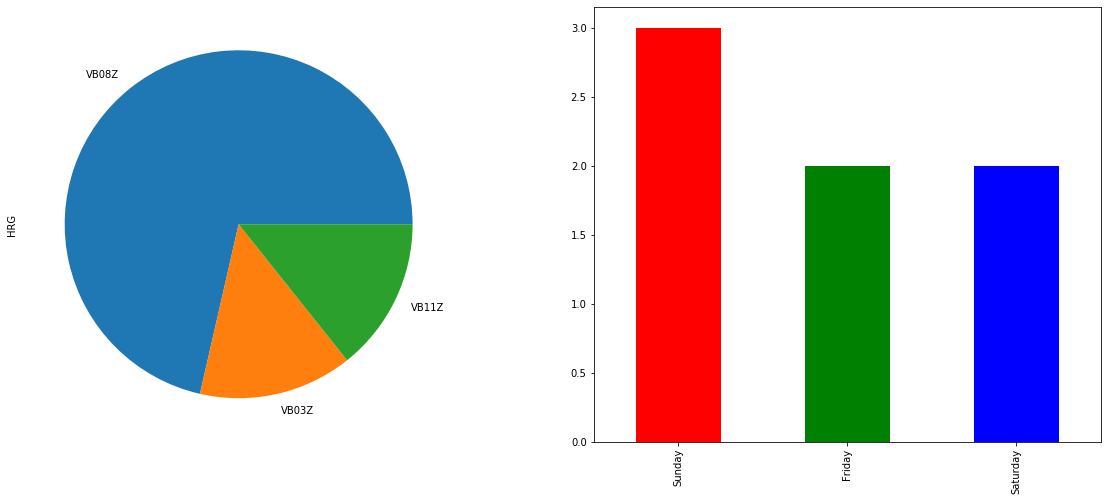

In [24]:
def main(data = sample):
            m = input("Select your desired operation \n 1. Correlate 2. Plot 3. Range 4. Patient Info  5. Categorical  6. Breach Info 7. Exit \n Choose between 1-6 \n")  
            if(int(m) == 1): #1. Correlate
                while(True):
                    try:
                        inp = input("Do you want to Correlate 1. Full Data or  2.Two Variables \n Choose 1 or 2 \n")
                        if(int(inp) == 1):
                            full_correlation()
                        elif(int(inp) == 2):
                            inp1 , inp2 = input("Which TWO variables do you want to compare? \n 1: Age   2:LoS   3: noofinvestigation   4: nooftreatments   5:noofpatients  \n Choose one from 1-5 SPACE Choose different one from 1-5 \n").split()
                            a, b = int_to_str2(int(inp1), int(inp2))
                            print(correlation(a,b,data))
                        else:
                            print("Invalid Input")
                        break
                    except ValueError:
                        print("Incorrect input!")
                    except KeyError:
                        print("Invalid Input: Please Choose Numbers between 1-5 with a SPACE between them.")
                    except TypeError:
                        print("Invalid Input: Please Choose Numbers between 1-5 with a SPACE between them.")
   
            elif(int(m) == 2): # 2. Plot
                while(True):
                    try:
                        inp = input("Do you want plots for 1 or 2 variables ?\n Choose 1 or 2 \n")
                        if(int(inp) == 1):
                            inp9 = input("Which variable do you want to plot? \n 1: Age 2: LoS 3: noofinvestigation 4: nooftreatment 5:noofpatients 6: HRG \7: Day of the Week \n  Choose between 1-7 \n")
                            verify9 = [1,2,3,4,5,6,7]
                            if(int(inp9) in verify9):
                                x = int_to_str(int(inp9))
                                inp10 = int(input("Choose one of the following plots:\n 1 : Histogram \n 2 : BoxPlot \n 3 : Pie Chart \n 4 : Dist Plot \n Choose between 1-4 \n"))
                                print("here?")
                                plots(x,inp10,data)
                            else:
                                print("here?")
                                print("Invalid Input")
                                main() 
            
                        elif(int(inp) == 2): 
                            inp6 = input("Which variable do you want to plot? \n  1: Age 2: LoS   3: noofinvestigation  4: nooftreatment  5:noofpatients  6: HRG 7. Day of the Week\n Choose between 1-7 \n")
                            verify6 = [1,2,3,4,5,6,7]
                            if(int(inp6) in verify6):
                                a = int_to_str(int(inp6))
                                
                                if (a == 'Age'):
                                    ch = int(input("Which Variable do you want to plot Age with \n 2: LoS   3: noofinvestigation  4: nooftreatments  5:noofpatients  6: HRG  7: DayofWeek \n"))
                                    verify = [2,3,4,5,6,7]
                                    if ch not in verify:
                                        print("Invalid Input")
                                        continue
                    
                                elif (a == 'LoS'):
                                    ch = int(input("Which Variable do you want to plot LoS with \n 1: Age 3: noofinvestigation 4: nooftreatments 5: noofpatients 6: HRG  7: DayofWeek \n"))
                                    verify = [1,3,4,5,6,7]
                                    if ch not in verify:
                                        print("Invalid Input")
                                        continue
                    
                                elif (a == 'noofinvestigation'):
                                    ch = int(input("Which Variable do you want to plot noofinvestigation with \n 1: Age 2: LoS 4: nooftreatments 5: noofpatients 6: HRG  7: DayofWeek \n"))
                                    verify = [1,2,4,5,6,7]
                                    if ch not in verify:
                                        print("Invalid Input")
                                        continue
                    
                                elif (a == 'noofpatients'):
                                    ch = int(input("Which Variable do you want to plot noofpatients with \n 1: Age 2: LoS 3: noofinvestigation 4: nooftreatments 6: HRG  7: DayofWeek \n"))
                                    verify = [1,2,3,4,6,7]
                                    if ch not in verify:
                                        print("Invalid Input")
                                        continue
                    
                                elif (a == 'nooftreatment'):
                                    ch = int(input("Which Variable do you want to plot nooftreatment with \n 1: Age 2: LoS 3: noofinvestigation 5: noofpatients 6: HRG  7: DayofWeek \n"))
                                    verify = [1,2,3,5,6,7]
                                    if ch not in verify:
                                        print("Invalid Input")
                                        continue
                                elif (a == 'HRG'):
                                    ch = int(input("Which Variable do you want to plot HRG with \n 1: Age 2: LoS 3: noofinvestigation 4: nooftreatments 5: noofpatients 7: DayofWeek \n"))
                                    verify = [1,2,3,4,5,7]
                                    if ch not in verify:
                                        print("Invalid Input")
                                        continue
                    
                                elif (a == 'DayofWeek'):
                                    ch = int(input("Which Variable do you want to plot HRG with \n 1: Age 2: LoS 3: noofinvestigation 4: nooftreatments 5: noofpatients 6: HRG \n"))
                                    verify = [1,2,3,4,5,6]
                                    if ch not in verify:
                                        print("Invalid Input")
                                        continue
                                else:
                                    print("Invalid Input")
                                    continue
                                
                            else:
                                continue

                                
                            inp8 = int(input("Choose one of the following plots:\n 1 : Scatter Plot \n 2 : Bar Plot\n Choose 1 or 2 \n"))
                            br = int_to_str(ch)
                            plots_two(a,br,inp8,data)
                    
                        break
                    except ValueError:
                        print("Incorrect input!")
    
            elif(int(m) == 3): # 3. Range
                while(True):
                    try:
                        inp3 = int(input("Which variable do you want to analyse? \n 1: Age    2: LoS   3: noofinvestigation  4: nooftreatments  6: HRG   5: noofpatients 7. Day of the Week \n Choose between 1-7 \n"))
                        verify3 = [1,2,3,4,5,6,7]
                        if(int(inp3) in verify3):
                            v2 = int_to_str(inp3)
                            data_range = variable_range(v2)
                            print(data_range)
            
                            yn = input("Do you want to analyse data for the range selected?   Choose (Y or N) ===> ")
                            if(yn == 'Y' or yn == 'y'):
                                main(data_range)
                            
                            else:
                                main()
                                
                    except ValueError:
                        print("Incorrect input!")
        
            elif(int(m) == 4): #4. Patient Info
                flag = 0
                while flag == 0:
                    Patient_Id = input(" Please provide the id of patient ? ")
                    Patient_info = data.loc[sample['ID'] == Patient_Id]
                    if Patient_info.empty == True:
                        print("Oops! That was not a valid number. Try again...")
                        continue
                    else:
                        print(Patient_info)
                        flag = 1
        
            elif(int(m) == 5): #5. Categorical
                while True:
                    try:
                        inp10 = int(input("Which variable do you want to analyse? \n 1: Age   2:LoS   3: noofinvestigation   4: nooftreatments   5:noofpatients  6. HRG   7. Day of the Week \nChoose between 1-7 \n"))
                        v3 = int_to_str(inp10)
                        data_range = categorical(v3)
                        print(data_range)
            
                        yn = input("Do you want to analyse data for the range selected?   Choose(Y or N) ===> ")
                        if(yn == 'Y' or yn == 'y'):
                            main(data_range)
                        break
                    except ValueError:
                        print("Please Input a Number")
                    except UnboundLocalError:
                        print("Invalid Input : Please choose a number between 1-7")
            
            elif(int(m) == 6):
                more()
            
            elif( int(m) == 7): # 7 Exit
                print("Thank You!")
                sys.exit()
        
            else:
                print("Error: Invalid Input. \n Please Choose between 1-6")
                main()

main()